In [3]:
import requests
from bs4 import BeautifulSoup

### 네이버 현재 상영하고 있는 영화평점 리뷰의 영화제목, 링크주소, 평점을 크롤링한다.
* 1) 네이버 영화 사이트로 이동한다.
        url주소 : https://movie.naver.com/movie/point/af/list.naver?&page=1
* 2) get 방식으로 호출하여 데이터를 크롤링한다.        
* 3) page=xx 파라미터에 값을 변화하여 처리한다.

In [4]:
url_main = "https://movie.naver.com"
url_sub = "/movie/point/af/list.naver?&page=1"
url = url_main+url_sub
print(url)
req=requests.get(url)

print("status code :", req.status_code)


https://movie.naver.com/movie/point/af/list.naver?&page=1
status code : 200


In [5]:
html = req.text
soup = BeautifulSoup(html, 'html.parser')

soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="평점 : 네이버 영화" property="og:title"/>
<meta content="네티즌 평점과 리뷰 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/point/af/list.naver?&amp;page=1" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="https://mo

### 태그 분석 : 네이버 평점 리뷰 부분의 추출하고자 하는 데이터 부분에 대한 태그 분석
* 1) table태그 범위 안에 추출하고자 하는 전체 데이터가 다 있음(분석 : table cellspacing="0" class="list_netizen")
   * 사용 노드 : table.list_netizen > tbody > tr > td.title 에 추출하고자 하는 데이터가 있다 
* 2) 영화 제목 : a class="movie color_b" 이곳의 텍스트 사용
   * 영화제목 링크는 생대경로로 되어 있음(href="?st=mcode&amp;sword=205614&amp;target=after")
* 3) 평점 : div class="list_netizen_score" 의 텍스트
* 4) 댓글 : br 태그 
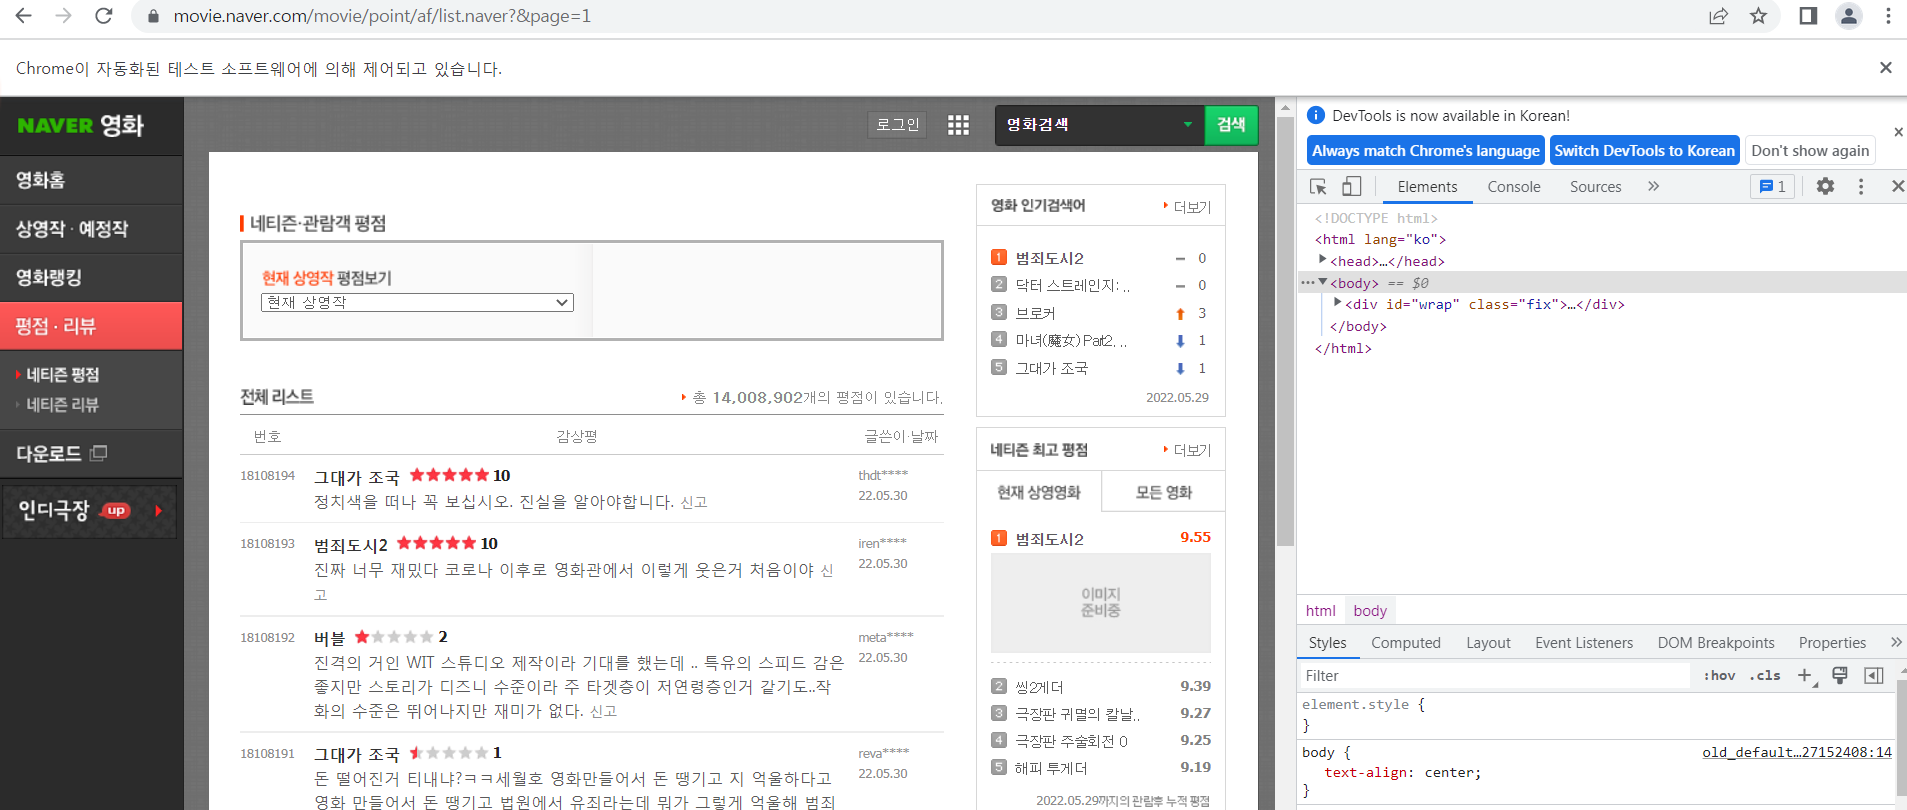

In [8]:
url_main = "https://movie.naver.com"
url_sub = "/movie/point/af/list.naver?&page=1" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub

req=requests.get(url)
print("status code :", req.status_code)

status code : 200


In [9]:
if req.status_code == 200 : 
    html = req.content
#    soup = BeautifulSoup(html, 'html.parser')
    soup = BeautifulSoup(req.content)
    tdlist = soup.select("table.list_netizen > tbody > tr > td.title")
    print(len(tdlist))
    print(tdlist)
#    print(soup)
    for x in tdlist:
        mtitle = x.select_one("a.movie").text.strip()
        mlink = x.select_one("a.movie").get("href")
        mscore = x.select_one("div.list_netizen_score > em").text.strip()
        mcomment = x.select_one("br").next_sibling.strip()
        
        print(mtitle, mlink, mscore, mcomment,sep="^==^")
        print("="*100)
else:
    print("네이버영화감상 사이트에서 정상적으로 호출되지 않았습니다.")

10
[<td class="title">
<a class="movie color_b" href="?st=mcode&amp;sword=216100&amp;target=after">그대가 조국</a>
<div class="list_netizen_score">
<span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
</div>
<br/>정치색을 떠나 꼭 보십시오. 진실을 알아야합니다. 
			
			
			
				
				
				
				<a class="report" href="#" onclick="report('thdt****', '3q7cLY3bgM9USmjXj9dfMzeOW2LpKpgDx5BPbzgPgYM=', '정치색을 떠나 꼭 보십시오. 진실을 알아야합니다.', '18108194', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
</td>, <td class="title">
<a class="movie color_b" href="?st=mcode&amp;sword=192608&amp;target=after">범죄도시2</a>
<div class="list_netizen_score">
<span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
</div>
<br/>진짜 너무 재밌다 코로나 이후로 영화관에서 이렇게 웃은거 처음이야 
			
			
			
				
				
				
				<a class="report" href="#" onclick="report('iren****', 'PDVZsxoFYSU9vN6oi9s6A6cottGG7Hm1ZeTD4n7TZdI=', '진짜 너무 재밌다 코로나 이후로 영화관에서 이렇게 웃은거 처음이야', '18108193', 'poi

### 전체 페이지 조회하기
#### 페이지를 바로 넘기는 경우 크롤링이 막힐 수 있으므로 deley타임을 주어야 함

In [84]:
import requests
from bs4 import BeautifulSoup
import time
import random

In [110]:
url_main = "https://movie.naver.com"
url_sub = "/movie/point/af/list.naver?&page={}" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub

list_comment = []
pagerange = 2

In [111]:
for pagenm in range(1,pagerange+1):
    url = url.format(pagenm)
    req=requests.get(url)
    print("status code :", req.status_code)

    if req.status_code == 200 : 
        html = req.content
    #    soup = BeautifulSoup(html, 'html.parser')
        soup = BeautifulSoup(req.content)
        tdlist = soup.select("table.list_netizen > tbody > tr > td.title")
        print(len(tdlist))
    #    print(tdlist)
    #    print(soup)
        for x in tdlist:
            mtitle = x.select_one("a.movie").text.strip()
            mlink = x.select_one("a.movie").get("href")
            mscore = x.select_one("div.list_netizen_score > em").text.strip()
            mcomment = x.select_one("br").next_sibling.strip()
            list_comment.append((str(pagenm)+"page", mtitle, mlink, mscore, mcomment))
        interval = round(random.uniform(0.2,1.2),2)
        time.sleep(interval)
    else:
        print("네이버영화감상 사이트에서 정상적으로 호출되지 않았습니다.")    

status code : 200
10
status code : 200
10


In [112]:
print(list_comment)

[('1page', '시카리오: 암살자의 도시', '?st=mcode&sword=125466&target=after', '10', '두 번 보고... 세 번 봐도.. 몰입과 여주의내적 갈등을 이렇게 적나라하게 보여주는 영화는 없었다. 늑대의 연기는 더 할 나위 없다'), ('1page', '랑종', '?st=mcode&sword=204496&target=after', '1', '진짜로 후기는 존나 안 무섭다고 적혀있는네 존나 무서움 보지마셈 진짜 하루 종일 귀신 대가리 생각남 ㄷㄷ..'), ('1page', '꽃다발 같은 사랑을 했다', '?st=mcode&sword=200896&target=after', '10', '너무 현실적이라 아픈 영화 오래 기억될 듯'), ('1page', '블랙핑크 더 무비', '?st=mcode&sword=206577&target=after', '1', '블랙핑크 빠순이 아니면 볼 가치 없음'), ('1page', '모가디슈', '?st=mcode&sword=192150&target=after', '10', '정말 오랜만에 볼만한 영화가 나왔음'), ('1page', '모가디슈', '?st=mcode&sword=192150&target=after', '10', '구교환 정말 매력있게 나옴'), ('1page', '모가디슈', '?st=mcode&sword=192150&target=after', '10', '진짜 재밌어용'), ('1page', '모가디슈', '?st=mcode&sword=192150&target=after', '10', '코러나 때문에 한동안 극장을 안갔었는데  평이좋아 선택해거 간만에 재밌게 봤습니다~~박진감 넘치고 스토리 좋아요~~^^'), ('1page', '더 수어사이드 스쿼드', '?st=mcode&sword=167569&target=after', '4', '아무리 개인취향이라지만 이런 영화가 8점대라는게 놀랍다.할리퀸의 단독 액션신에 별 2개준다.DC는 그냥 열심히 다크나이트 시리즈 만들자.'), ('1

### 파일로 저장하기
* 한글깨짐 방지 : to_csv 사용시 encoding = "euc-kr" 사용하여 한글깨짐 방지, utf-8사용하면 한글 깨짐 발생할 수 있음

In [114]:
import pandas as pd

In [118]:
df = pd.DataFrame(list_comment, columns = ["no","영화제목", "링크주소", "평점", "댓글내용"])

df.to_csv("naver_movie.csv", encoding="euc-kr", index=False)